# Answer template

Please use this notebook for your coursework. Feel free to add more cells for your code and answers, but try to stick to this format. This will make it easier to mark everyone's work fairly.

___________________

In [1]:
# run this
!pip list

Package                       Version
----------------------------- ---------
aiobotocore                   2.5.0
aiofiles                      22.1.0
aiohttp                       3.8.3
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-anon-usage           0.4.2
anaconda-catalogs             0.2.0
anaconda-client               1.12.0
anaconda-cloud-auth           0.1.3
anaconda-navigator            2.5.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
applaunchservices             0.3.0
appnope                       0.1.2
appscript                     1.1.2
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
async-timeout                 4.0.2
atomicwrites    

sphinxcontrib-qthelp          1.0.3
sphinxcontrib-serializinghtml 1.1.5
spyder                        5.4.3
spyder-kernels                2.4.3
SQLAlchemy                    1.4.39
stack-data                    0.2.0
statsmodels                   0.14.0
sympy                         1.11.1
tables                        3.8.0
tabulate                      0.8.10
TBB                           0.2
tblib                         1.7.0
tenacity                      8.2.2
terminado                     0.17.1
text-unidecode                1.3
textdistance                  4.2.1
threadpoolctl                 2.2.0
three-merge                   0.1.1
tifffile                      2021.7.2
tinycss2                      1.2.1
tldextract                    3.2.0
tokenizers                    0.13.2
toml                          0.10.2
tomlkit                       0.11.1
toolz                         0.12.0
torch                         2.0.1
tornado                       6.3.2
tqdm                

# Part A – Exploratory data analysis and data visualisation 

1. Using the pandas library, read the file dataset1.csv into a dataframe. Print or display the first five rows of the dataset. [1 mark]

In [2]:
import pandas as pd
dataset1 = pd.read_csv('dataset1.csv')
dataset1.head()

,Monastery,Latitude,Longitude,City,Country,Administrative Region,Historical Region,Starting,Ending,Monastery_index
0,Cistercians,47.13,15.28,Seckau,Austria,Steiermark,STYRIA (AUSTRIA),1130,1958,0
1,Cistercians,48.05,16.13,Vienne,Austria,Niederoesterreich,STYRIA (AUSTRIA),1135,2011,0
2,Cistercians,48.61,15.20,Sanct Pölten,Austria,Niederoesterreich,STYRIA (AUSTRIA),1138,2011,0
3,Cistercians,48.20,14.74,Linz,Austria,Oberoesterreich,STYRIA (AUSTRIA),1142,1784,0
4,Cistercians,48.32,14.17,Linz,Austria,Oberoesterreich,STYRIA (AUSTRIA),1146,1945,0


2. Make a scatterplot from the dataset, with the Longitude column on the x axis, the Latitude column on the y axis, and the colour corresponding to the Monastery_index column. Within the scatterplot function, set the colour map to ’rainbow’. The result should be a scatterplot showing the position of every monastery, with different colours for monasteries with different values in Monastery_index.  [1 mark]

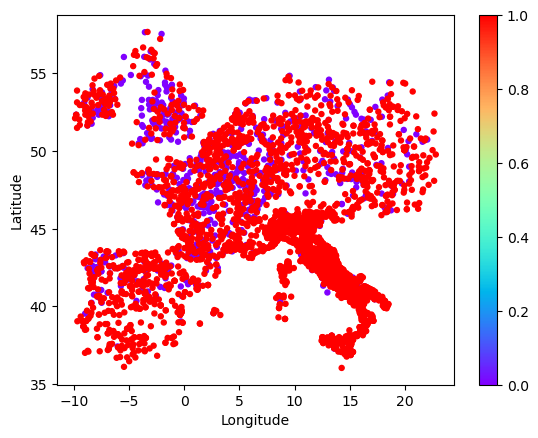

In [3]:
ax = dataset1.plot.scatter(x= 'Longitude', y= 'Latitude', c= dataset1['Monastery_index'], cmap= 'rainbow', s=13)

3. Plot a histogram for the monastery starting year of activity, represented in the Starting column.
Add the title “Starting year” to the plot. [1 mark]

Text(0, 0.5, 'Frequency')

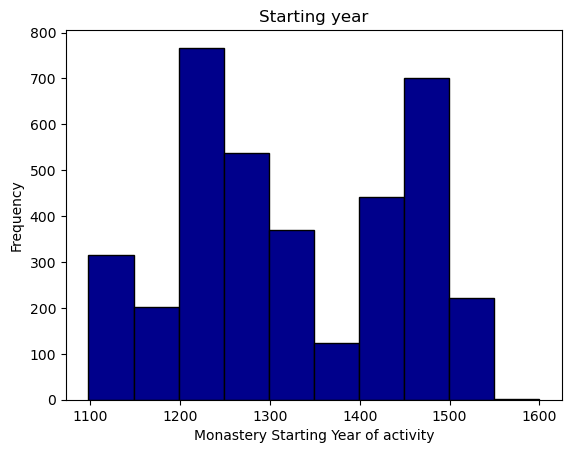

In [4]:
import matplotlib.pyplot as plt
starting_years = dataset1['Starting']
plt.hist(starting_years, color='darkblue', edgecolor='black')
plt.title('Starting year')
plt.xlabel('Monastery Starting Year of activity')
plt.ylabel('Frequency')

4. Make a figure with two histograms, still using the Starting column:

a) One histogram representing the Cistercian monasteries, corresponding to rows in the dataframe where the Monastery column is equal to 'Cistercians'.

b) And one histogram representing the Franciscan monasteries, corresponding to rows in the dataframe where the Monastery column is equal to 'Franciscans'.

c) Add a legend indicating which histogram corresponds to which type of monastery.

d) Add the title “Starting year” to the figure. 

[2 marks]

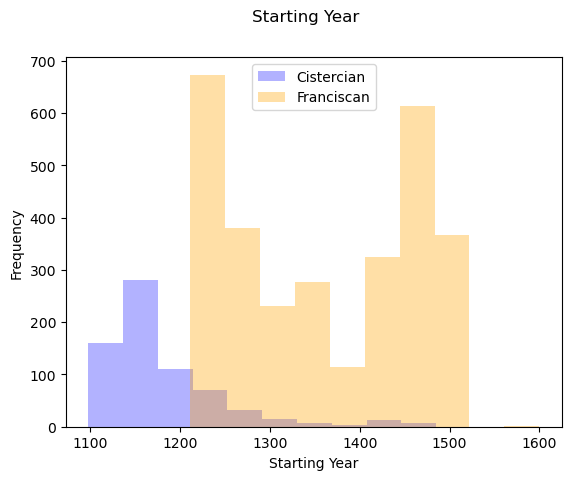

In [5]:
cist_data = dataset1[dataset1['Monastery'] == 'Cistercians']
franc_data = dataset1[dataset1['Monastery'] == 'Franciscans']

plt.hist(cist_data['Starting'], color = 'blue', alpha = 0.3, label = 'Cistercian')
plt.hist(franc_data['Starting'], color ='orange', alpha = 0.35, label = 'Franciscan')

plt.legend()
plt.xlabel('Starting Year')
plt.ylabel('Frequency')
plt.suptitle('Starting Year') 

plt.show()

5. Repeat numbers 3 and 4, but for the Ending column. Add the title “Ending year” to the plot.
[2 marks]

Text(0.5, 0.98, 'Ending Year')

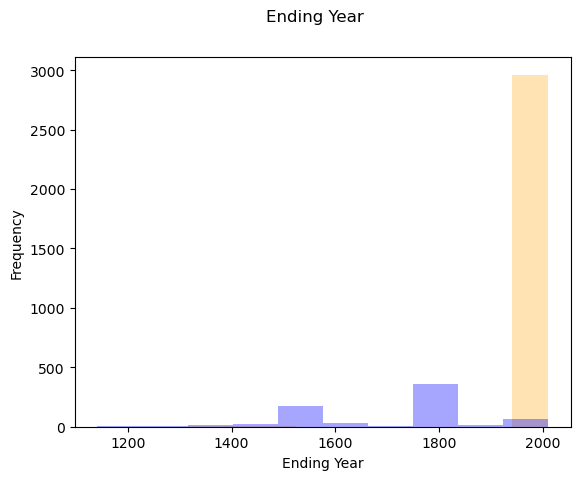

In [6]:
ending_years = dataset1['Ending']

cist_data = dataset1[dataset1['Monastery'] == 'Cistercians']
ending_years_cist = cist_data['Ending']

franc_data = dataset1[dataset1['Monastery'] == 'Franciscans']
ending_years_franc = franc_data['Ending']

plt.hist(ending_years_franc, color='orange', alpha = 0.3, label= 'Francisan Monasteries')
plt.hist(ending_years_cist, color='blue', alpha = 0.35, label = 'Cistercians Monasteries') 
plt.xlabel('Ending Year')
plt.ylabel('Frequency')
plt.legend

plt.suptitle('Ending Year') 

6. Count the number of times each country appears in the Country column. Use that to make a bar plot, showing one bar for each country, with the bar height representing how many times each country appears in the Country column. This corresponds to the number of monasteries found in each country.
[2 marks]

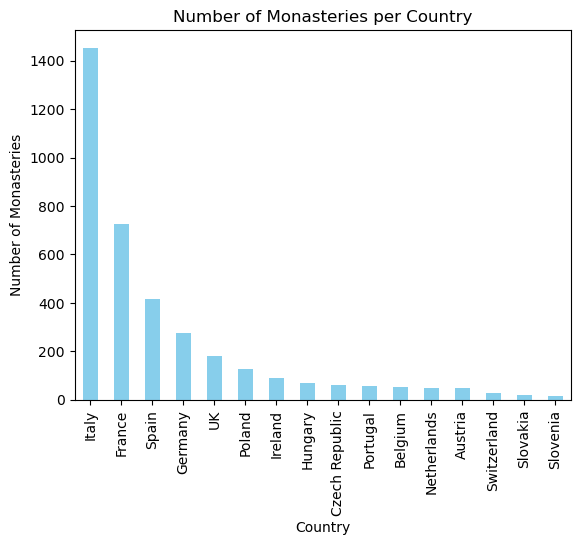

In [7]:
country_counts = dataset1['Country'].value_counts()
country_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Monasteries per Country')
plt.xlabel('Country')
plt.ylabel('Number of Monasteries')
plt.show()

_____________________

# Part B – Training classifiers

7.	Define a variable X corresponding to the Starting and Ending columns of the dataset, and a variable y corresponding to the Monastery_index column. [1 mark]

In [8]:
X = dataset1[['Starting','Ending']]
y = dataset1['Monastery_index']

8.	Perform a train-test split, separating X and y into a training test and a test set, leaving 33% of the data in the test set. [1 mark]

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

9.	Classification using a Perceptron:

a)	Fit a perceptron to the training data, and use it to predict y values for the test set.
[1 mark]

b)	Calculate the fraction of data points in the test set where the predicted y values and the actual y values differ. This fraction should be equal to zero if the prediction is perfect, and equal to 1 if the prediction is wrong for 100% of the test set. Print the value of that fraction in decimals (like 0.01, 0.2394, or 0.9999923).  [2 marks]

c)	Plot a confusion matrix showing how well the classifier performs on the test set. [1 mark]

d)	Treating “Franciscan” as “Positive” and “Cistercian” as “Negative”, Print out the precision, recall, accuracy and F1 score of the perceptron. [2 marks]

Fraction: 0.2034596375617792
Precision: 0.7965403624382208
Recall: 1.0
F1 score: 0.8867491976157726
Accuracy: 0.7965403624382208


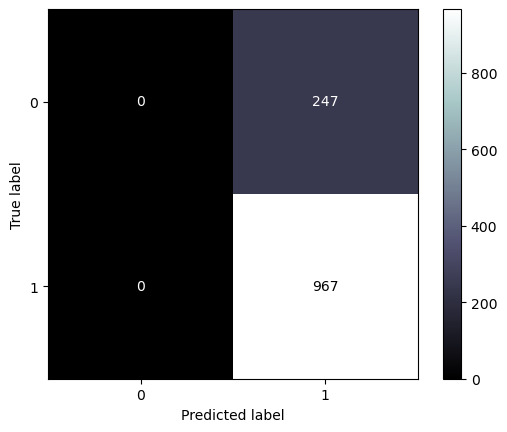

In [10]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)

denominator = 0 
numerator = 0

for x in range(len(y_test)):
    denominator += 1
    if y[x] != y_pred[x]:
        numerator += 1
    frac = (numerator)/(denominator)

print('Fraction:', 1- perceptron.score(X_test, y_test))

perceptron.score(X_test, y_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='bone')

print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))


10.	Classification using Logistic Regression: do the same as the question above, but using the logistic regression classifier. [4 marks]

Fraction: 0.017298187808896248
Precision: 0.983640081799591
Recall: 0.9948293691830403
F1 score: 0.9892030848329048
Accuracy: 0.9827018121911038


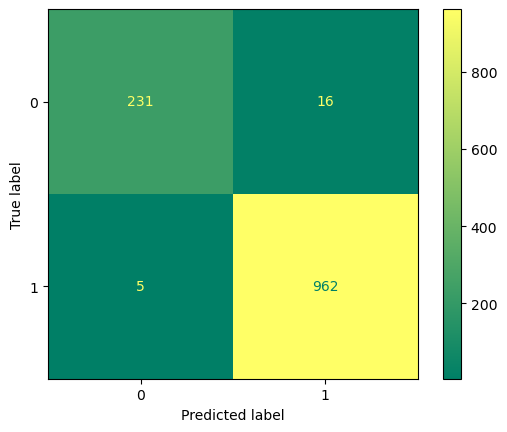

In [11]:
from sklearn.linear_model import LogisticRegression 
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

y_pred = log_reg.predict(X_test)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap = 'summer')

denominator = 0 
numerator = 0

for x in range(len(y_test)):
    denominator += 1
    if y[x] != y_pred[x]:
        numerator += 1
    frac = (numerator)/(denominator)

print('Fraction:', 1- log_reg.score(X_test, y_test))

print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

For open-ended questions like the ones below, write your answers in a new cell of code, either as a commented-out line starting with #, or as a markdown cell. Indicate what question you’re answering, by copying the question as well. For example:

11.	Explain the importance of the train-test split in machine learning. What might happen if you don’t have a proper split? [ 2 marks ]

The train-test split is essential for assessing how well a model performs on unknown data, preventing overfitting, and guaranteeing effective generalisation. Without a proper split, the model's performance may be overestimated or underestimated and not a correct representation of the data. 

12.	Which classifier (Perceptron or Logistic Regression) performed better at this task? Explain how you’ve arrived at this answer. [4 marks] 

Logistic Regression performed better at this task than the Perceptron. For the Logistic Regression model, the accuracy value is approximately 0.97858... which illustrates a high accuracy for the model against the training data. However, the Perceptron model has an accuracy value of approximately 0.82289... which is considerably lower. The Logistic Regression model also only has around 7 false negatives and 19 false positives out of a total number of 1214 data points, while the Perceptron model has around 215 false positives out of 1014 total data points. In addition to this, the Logistic Regression model incorrectly predicts the values approximately 20% of the time. This figure comes from a fraction comparing predicted y values and actual y values in the test set. The recall for the Perceptron model is higher, almost always being 1, meaning that the Perceptron model produces no false negatives and the Logistic Regression model is lower than 1 meaning it does produce false negatives. However, the recall value for the Logistic Regression model is higher meaning it has more correct predictions than the Perceptron model. 

13.	If you run the code from questions 8, 9, and 10 again, do the scores (precision, recall, accuracy, F1) change? Why (or why not)? Explain where those scores come from, and how do they change (or don't change) if you run the code again. [3 marks]

Yes, the scores do indeed change. This is due to the process in which data points are split between train and test being random. The precision, recall, accuracy and F1 scores change depending on the distribution of true positives,
true negatives, false positives, and false negatives in the test set. Every time the code is run the test set's data points change and that is what impacts the scores. 

_______________

# Part C – Linear Regression

14. Read the file `dataset2.csv` into a dataframe. Make four scatterplots, with different variables (different columns) on the x and y axes, with the variable `quality` on the colour axis. For each scatterplot, choose a different pair of x and y variables, which cannot include `quality`. [1 mark]

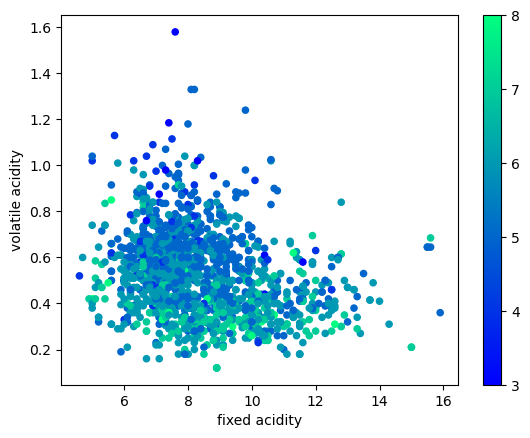

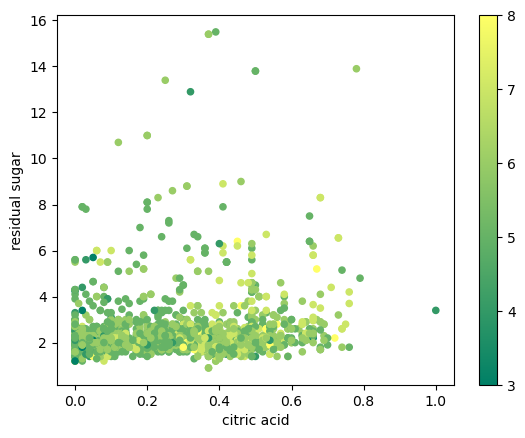

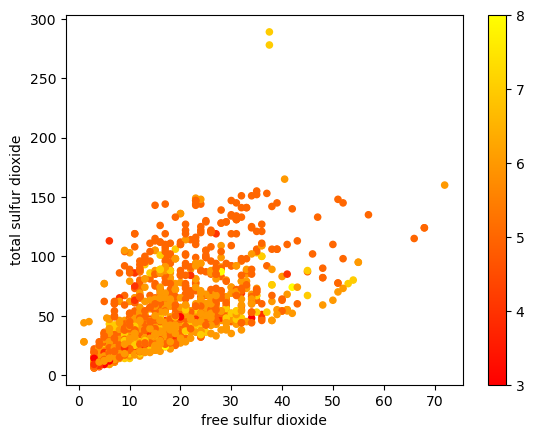

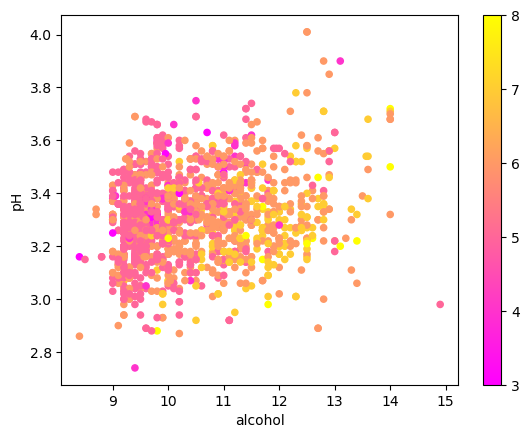

In [12]:
dataset2 = pd.read_csv('dataset2.csv')
colour = dataset2['quality']
ax = dataset2.plot.scatter(x= 'fixed acidity', y= 'volatile acidity', c = colour, cmap = 'winter')
ax = dataset2.plot.scatter(x= 'citric acid', y= 'residual sugar', c = colour, cmap = 'summer')
ax = dataset2.plot.scatter(x= 'free sulfur dioxide', y= 'total sulfur dioxide', c = colour, cmap = 'autumn')
ax = dataset2.plot.scatter(x= 'alcohol', y= 'pH', c = colour, cmap = 'spring')

15. Print the Pearson correlation between the pairs of variables you have included in the scatterplots. 
For every pair of variables, print the names of the variables, and the corresponding correlation. 
[1 mark]

In [1]:
import scipy.stats
acidity_pearson = scipy.stats.pearsonr(dataset2['fixed acidity'], dataset2['volatile acidity'])
print(f"The Pearson correlation for the variables fixed acidity and volatile acidity: \n{acidity_pearson}")
citric_pearson = scipy.stats.pearsonr(dataset2['citric acid'], dataset2['residual sugar'])
print(f"The Pearson correlation for the variables citric acid and residual sugar: \n{citric_pearson}")
sulfur_pearson = scipy.stats.pearsonr(dataset2['free sulfur dioxide'], dataset2['total sulfur dioxide'])
print(f"The Pearson correlation for the variables free sulfur dioxide and total sulfur dioxide: \n{sulfur_pearson}")
alcohol_pearson = scipy.stats.pearsonr(dataset2['alcohol'], dataset2['pH'])
print(f"The Pearson correlation for the variables alcohol and pH: \n{alcohol_pearson}")

NameError: name 'dataset2' is not defined

16. Linear regression: [2 marks]
    
a) Choosing the input variable X corresponds to any three columns of the dataset, except for `quality`, and the variable y corresponds to the `quality` column.

b) Fit a linear regression between X and y.

c) Print out the R2 score of the linear regression.

d) Print out the linear regression model’s slope coefficients and intercept.

In [14]:
from sklearn.linear_model import LinearRegression 
X = dataset2[['volatile acidity','citric acid', 'pH']]
y = dataset2['quality']

lin_reg = LinearRegression()
lin_reg.fit(X, y)

R2 = lin_reg.score(X, y)
print("The R2 score is", R2)

coeff = lin_reg.coef_
intercept = lin_reg.intercept_

print("The models slope coefficients:", coeff)
print("The models intercept:", intercept)

The R2 score is 0.15501663125086795
The models slope coefficients: [-1.69936814  0.2047215   0.30104778]
The models intercept: 5.480706065149192


17. K-fold cross-validation [3 marks]

a) Using the same X and y variables defined in the question above, perform a K-fold cross-validation of the linear regression model, with K = 10.

b) For each fold, calculate the R2 score.

c) Print the mean and standard deviation of the five R2 scores.

In [15]:
from sklearn.model_selection import cross_val_score
import numpy as np

cv_scores = cross_val_score(lin_reg, X, y, cv=10, scoring='r2')

print("R2 scores for each fold:", cv_scores)

mean_r2 = np.mean(cv_scores)
print("Mean R2 score:", mean_r2)

stand_dev_r2 = np.std(cv_scores)
print("Standard deviation R2 score:", stand_dev_r2)

R2 scores for each fold: [-0.30469929  0.17619797 -0.1136182   0.13104587 -0.11851296  0.16616054
 -0.05937541  0.18625145  0.18830217  0.13410315]
Mean R2 score: 0.03858552999993542
Standard deviation R2 score: 0.1650430596354979


18.	If, rather than choosing three columns, you had used more columns to predict quality, would the R2 score of your model necessarily be higher? Why/why not? In which circumstances would it be higher or not? (Feel free to try it! But please provide a justification for your answer) [3 marks]

Using more columns can result in a higher R2 score if the added columns are relevant to the variable quality and therefore capture more variance in the model. However, if the columns added do not provide relevant information in relation to the variable quality, you could be introducing noise into your model leading to a lower R2 score. Also, another way the R2 score could be decreased is by adding too many features which can lead to overfitting, resulting in low bias but high variance, and therefore making the model not perform very well with new unseen data. 

19.	Imagine you have two linear regressions, one with R2 = 0.80 and another with R2 = 0.90. Under what circumstances would the first model be preferable over the second one? What if instead you had two classifiers, one with accuracy = 80% and another with accuracy = 90%? [3 marks]

If the model with an R2 score of 0.90 has this high score due to overfitting to the training data, then this would result in poor performance with unseen data. Also, the linear regression with the R2 score of 0.80 could be a simpler model which may be ideal for simpler tasks. In the case of classifiers, if the dataset has a class imbalance a high accuracy could be obtained by simply predicting the majority class. The classifier with lower accuracy might use more caution when correctly classifying the minority class.

_____________________

# Part D – Clustering

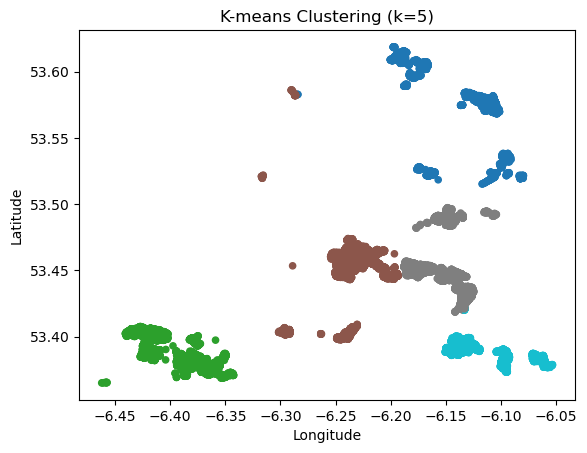

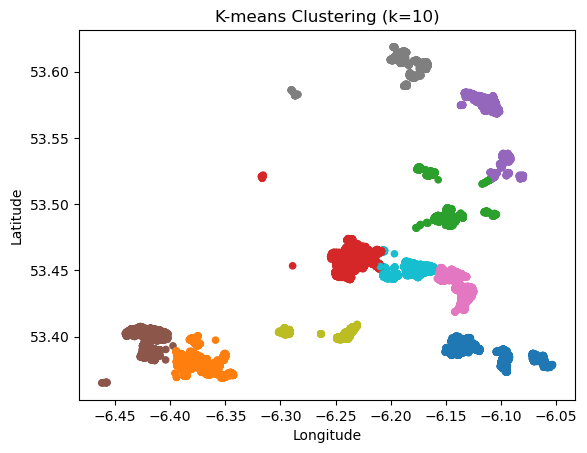

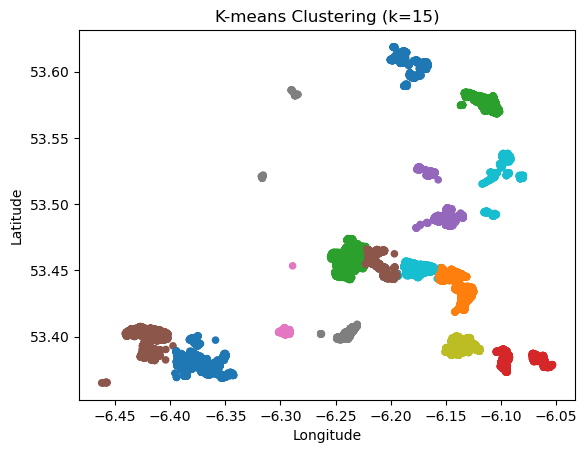

In [16]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

dataset3 = pd.read_csv('dataset3.csv')
X = dataset3[['Longitude', 'Latitude']]
k_values = [5, 10, 15]

for k in k_values:
    cluster_labels_kmeans = KMeans(n_clusters=k, n_init=10).fit_predict(X)

    plt.scatter(dataset3['Longitude'], dataset3['Latitude'], c=cluster_labels_kmeans, cmap='tab10', s=20)
    plt.title(f'K-means Clustering (k={k})')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

21. DBSCAN clustering:

a) Using the same X variable as above, using the DBSCAN clustering algorithm, cluster the trees a total of 4 times, setting the eps parameter to 0.001, 0.005, 0.01, 0.05.

b) Make a scatterplot showing the results of each clustering, with one colour for each cluster. 
Suggestion: use a categorical colour map such as tab10 or tab20.
[2 marks]

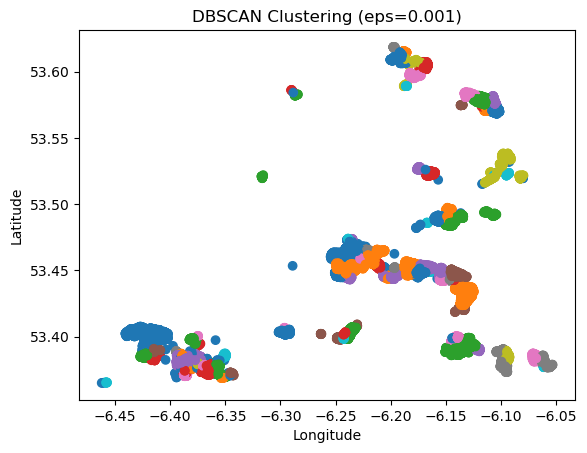

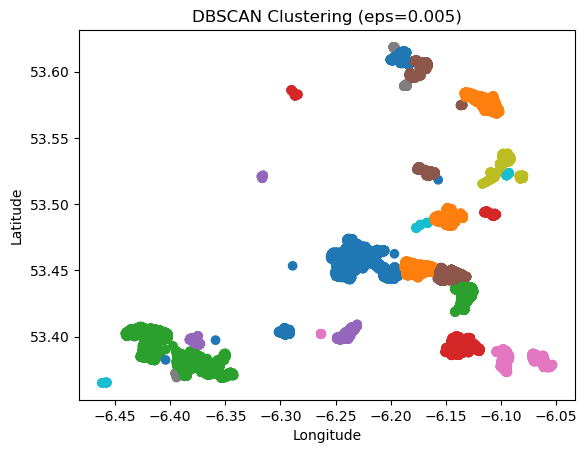

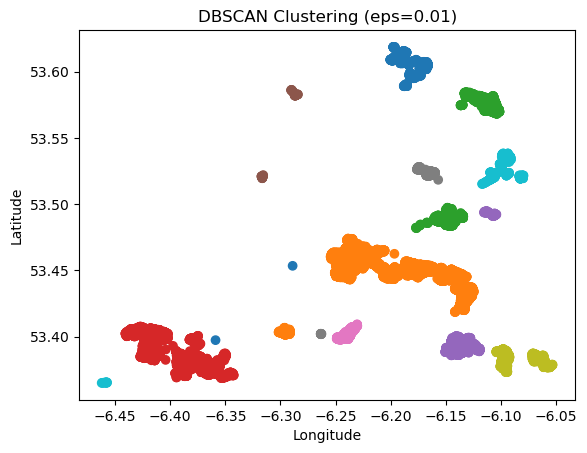

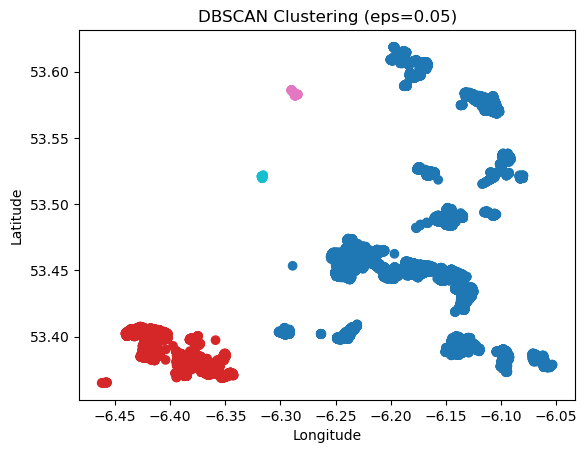

In [17]:
from sklearn.cluster import DBSCAN
eps_values = [0.001, 0.005, 0.01, 0.05]

for eps in eps_values:
    DBSCAN_cluster_labels = DBSCAN(eps=eps, min_samples=5).fit_predict(X)

    plt.scatter(dataset3['Longitude'], dataset3['Latitude'], c=DBSCAN_cluster_labels, cmap='tab10')
    plt.title(f'DBSCAN Clustering (eps={eps})')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()    

22. Using the Silhouette score, compare the 3 runs of K-means and the 4 runs of DBSCAN. Which one of the 7 runs produces the 
best clustering, according to the Silhouette score? [2 marks]

In [18]:
from sklearn.metrics import silhouette_score

kmeans_sil_scores = [] 
DBSCAN_sil_scores = []
best_silvalues_kmeans = []
best_silvalues_DBSCAN = []
bestk = 0
best_eps = 0

for k in k_values: 
    kmeans_sil_score= silhouette_score(X, cluster_labels_kmeans)
    kmeans_sil_scores.append(kmeans_sil_score)

for eps in eps_values: 
    DBSCAN_sil_score= silhouette_score(X, DBSCAN_cluster_labels)
    DBSCAN_sil_scores.append(DBSCAN_sil_score)
    
for i in kmeans_sil_scores: 
    for d in DBSCAN_sil_scores:
        if i > d:
            best_silvalues_kmeans.append(i)
            Ks = kmeans_sil_scores.index(i)
            if Ks == 0:
                bestk = 5
            elif Ks == 1:
                bestk = 10
            elif Ks == 2: 
                bestk = 15                         
        if i < d: 
            best_silvalues_DBSCAN.append(d)
            EPS = DBSCAN_sil_scores.index(d)
            if EPS == 0:
                besteps = 0.0001
            elif EPS == 1:
                besteps = 0.005
            elif EPS == 2: 
                best_eps = 0.01
            elif EPS == 3:
                best_eps == 0.05

if max(best_silvalues_kmeans, default= 0) > max(best_silvalues_DBSCAN, default= 0):
    print(f'The best clustering produced according to the Silhouette score was by KMeans for a k value of {bestk} and a Silhouette score of:',max(best_silvalues_kmeans))
else: 
    print(f'The best clustering produced according to the Silhouette score was by DBSCAN for an eps value of {best_eps} and a Silhouette score of:',max(best_silvalues_DBSCAN))

The best clustering produced according to the Silhouette score was by KMeans for a k value of 5 and a Silhouette score of: 0.6510114405187436


23. Using the Davies-Bouldin score, compare the 3 runs of K-means and the 4 runs of DBSCAN. Which one of the 7 runs produces the best clustering according to the Davies-Bouldin score? [2 marks]

In [19]:
from sklearn.metrics import davies_bouldin_score

kmeans_dav_scores = [] 
DBSCAN_dav_scores = []
best_davvalues_kmeans = []
best_davvalues_DBSCAN = []
bestk = 1
best_eps

for k in k_values: 
    kmeans_dav_score= davies_bouldin_score(X, cluster_labels_kmeans)
    kmeans_dav_scores.append(kmeans_dav_score)

for eps in eps_values: 
    DBSCAN_dav_score= davies_bouldin_score(X, DBSCAN_cluster_labels)
    DBSCAN_dav_scores.append(DBSCAN_dav_score)
    
for i in kmeans_dav_scores: 
    for d in DBSCAN_dav_scores:
        if i > d:
            best_davvalues_kmeans.append(i)
            Ks = kmeans_dav_scores.index(i)
            if Ks == 0:
                bestk = 5
            elif Ks == 1:
                bestk = 10
            elif Ks == 2: 
                bestk = 15                         
        if i < d: 
            best_davvalues_DBSCAN.append(d)
            EPS = DBSCAN_dav_scores.index(d)
            if EPS == 0:
                best_eps = 0.0001
            elif EPS == 1:
                best_eps = 0.005
            elif EPS == 2: 
                best_eps = 0.01
            elif EPS == 3:
                best_eps == 0.05

if max(best_davvalues_kmeans, default= 1) < max(best_davvalues_DBSCAN, default= 1):
    print(f'The best clustering produced according to the Davies Bouldin score was by KMeans for a k value of {bestk} and a Davies Bouldin score of:',max(best_davvalues_kmeans, default =0))
else: 
    print(f'The best clustering produced according to the Davies Bouldin score was by DBSCAN for an eps value of {best_eps} and a Davies Bouldin score of:',max(best_davvalues_DBSCAN, default =0))

The best clustering produced according to the Davies Bouldin score was by KMeans for a k value of 5 and a Davies Bouldin score of: 0.45016820820415115


24. Using another clustering algorithm (not K-means, not DBSCAN), and a range of hyperparameter values if appropriate, cluster the trees according to their latitude and longitude, as above. According to the silhouette and Davies-Bouldin scores, does any of your model runs produce better clustering? [2 marks]

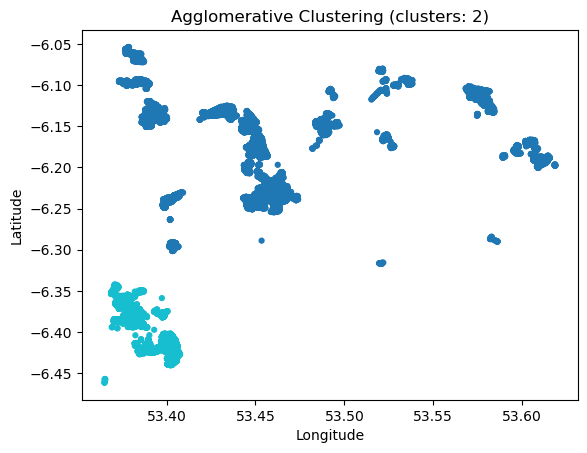

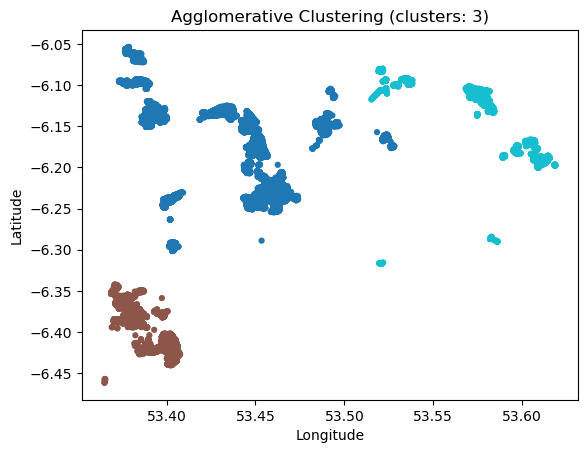

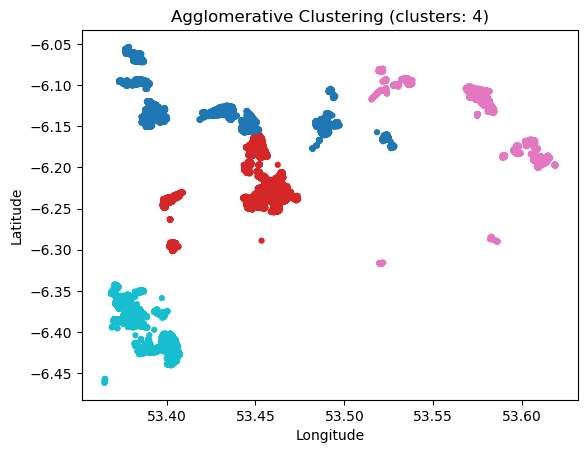

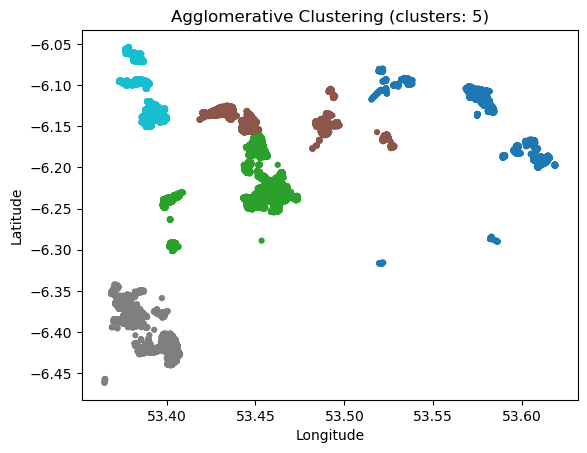

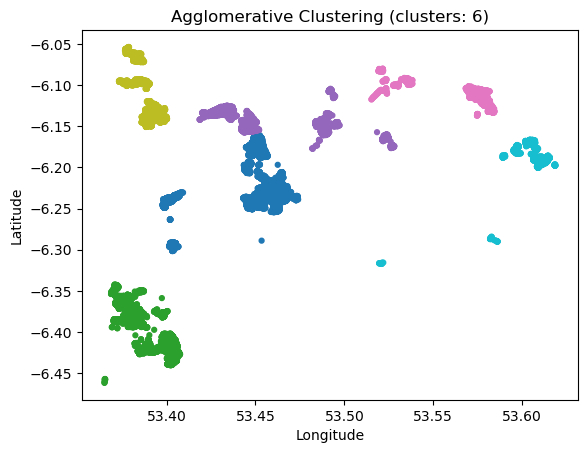

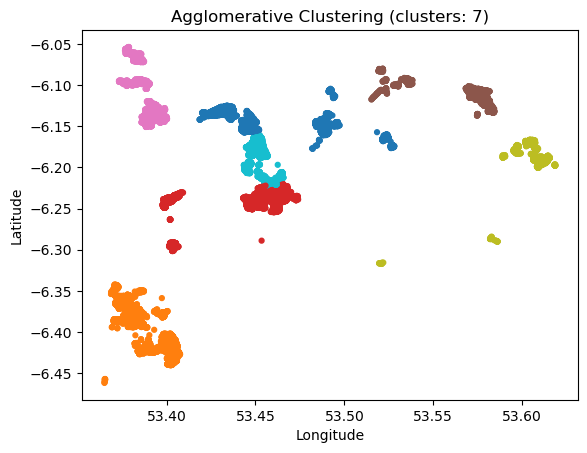

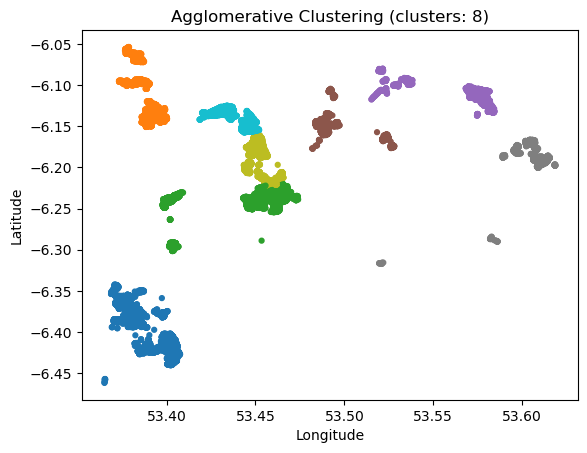

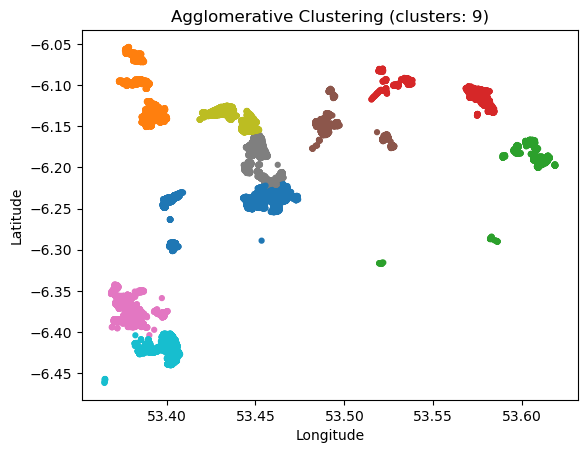

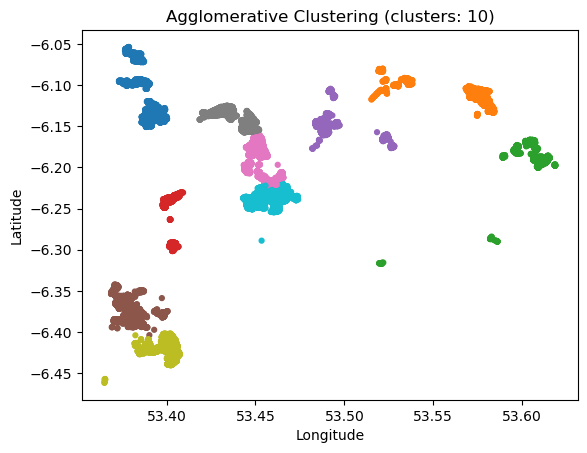

Silhouette score measures that Agglomerative Clustering is better for clustering with a score of: 0.6473669227595608
Davies Boudin score measures that Agglomerative Clustering is better for clustering with a score of: 0.6389618994400822


In [20]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt

n_clusters = np.arange(2, 11)
sil_scores = []
dav_scores = []

for n in n_clusters:
    agg_clust = AgglomerativeClustering(n_clusters=n, metric='euclidean', linkage='ward')
    cluster_labels = agg_clust.fit_predict(X)
    dataset3[f'cluster_{n}'] = cluster_labels

    plt.scatter(dataset3['Latitude'], dataset3['Longitude'], c=dataset3[f'cluster_{n}'], cmap='tab10', s=12)
    plt.title(f'Agglomerative Clustering (clusters: {n})')
    plt.ylabel('Latitude')
    plt.xlabel('Longitude')
    plt.show()

    sil_score = silhouette_score(X, cluster_labels, metric='euclidean')
    sil_scores.append(sil_score)
    
    dav_score = davies_bouldin_score(X, cluster_labels)
    dav_scores.append(dav_score)
        
if np.all(max(sil_scores) > val for val in [best_silvalues_kmeans, best_silvalues_DBSCAN]):
    print(f'Silhouette score measures that Agglomerative Clustering is better for clustering with a score of: {np.max(sil_scores)}')
else:
    print(f'Silhouette is not better for Agglomerative Clustering')
    
if np.all(min(dav_scores) < val for val in [best_davvalues_kmeans, best_davvalues_DBSCAN]):
    print(f'Davies Boudin score measures that Agglomerative Clustering is better for clustering with a score of: {np.max(dav_scores)}')
else:
    print(f'Davies Bouldin is not better for Agglomerative Clustering')

25. Usually, DBSCAN takes longer than K-means to run, and the time it takes to run is affected by the eps parameter. Explain why that is the case. [4 marks]

This is due to the nature in which DBSCANs decide how to make their clusters in comparison to K-means. For K-means, you decide the number of clusters (k) and the algorithm randomly selects a data point to act as the centroid for that cluster. Then data points are sorted into clusters depending on whichever centroid they are closer to. However, a DBSCAN is computationally more complex and has a lot more steps than K-means. You pick an epsilon (eps) value, which is simply a radius value, and this eps value affects the size of clusters. You are essentially choosing the optimal density of data points which will result in the most accurate clusters. Due to DBSCANs having to check each data point's surrounding data points for a given eps value and then assigning clusters, it usually takes longer. 

26. Provide an example of one case in which it might be better to use DBSCAN rather than K-means, and an example of one case in which it might be better to use K-means rather than DBSCAN. Explain why, in both cases. [4 marks]

DBSCAN is better for identifying shops within a city. For example, if you take London as the city, comparing Central London to the outskirts of London, Central London will be much more densely populated with shops compared to the outskirts of London. DBSCAN more clearly portray the data in this case as you have irregular shapes, an unknown number of clusters, and a scenario where you need to identify density. 
K-means can be used in deciding the number of delivery routes for a business that provides the shortest distance travelled and gets all products to customers. You would test for a range of values of k, and choose the best on least distance travelled. As you have a fixed number of well-defined clusters between the delivery destinations, K-means clustering would be better.

_____________________

# Part E – Model selection

27. Consider the figure in the PDF and compare models A and B. In each case, what difference would it make to add more training examples to the training set? Explain your reasoning. [4 marks]

For model A, adding more data points to the training set would likely not result in any change in error for the testing and training set. This is because the two curves, testing and training, have already converged meaning the error has already been brought to a minimum. The model has therefore learned as much as it can from the available data and additional data will not improve it. For model B adding more training examples is very likely to bring down the error for the testing set, until the testing set curve converges with the training set curve. This would happen since the curves have not converged and the testing set's error is decreasing with the addition of more training set examples, depicting that the model has not learnt as much as it can.

28.	Consider the second figure in the PDF and compare models A, B, and C. What is the difference between the three models? How does that relate to the bias-variance trade-off? [6 marks]

For model A both testing and training curves converge but at a high error value. This indicates a high bias and low variance therefore suggesting that the model is underfitting. You might attempt to use a more complex algorithm or add additional relevant features to this model to make it more complex and perform better. For model B both testing and training curves converge, same as model A, but at a much lower error value to model A. This means it would perform better than model A when given new data. Model B also has a lower bias value and a higher variance value, striking a better balance between the two. This model is the best out of the three but you may be able to improve it by slightly changing hyperparameters or maybe experimenting with different algorithms. Model C has both testing and training curves plateauing but far from each other, with the error value of the testing set high and the same as model A and the error value of the training set low and the same value as model B. As the two curves are far from each other this indicates a significantly higher variance and lower bias than both curves A and B, suggesting overfitting. The model would perform poorly with unseen data due to its overfitting. To help improve this model you may want to consider using a simpler model.

29.	What is overfitting? Why is that a problem, and how can one avoid it? [3 marks]

Overfitting is when a model is overly suited to its training set essentially fitting it too well. This is a problem as the model loses its ability to generalise and perform well when given unseen data. You can avoid this by using a less complex model and continuously testing with the train-test split, making adjustments when appropriate. 

________________

# Part F – Dimensionality reduction

Consider a scenario where you are working with a complex high-dimensional dataset derived from a biomedical application to detect a disease. The data is expected to have both linear and non-linear relationships, and you aim to reduce the dimensionality for the following purposes: first, to visualize the data in a lower-dimensional space to identify potential clusters or patterns that might indicate different disease states, and second, to preprocess the data for a downstream machine learning task, such as classification of samples into healthy or diseased states. 

30.	Discuss the advantages and disadvantages of using PCA, t-SNE, and UMAP for the visualization purpose, considering factors such as the preservation of local and global structures, computational efficiency, and the potential introduction of artifacts. [3 marks]

PCA significantly increases computational efficiency and decreases computation time by simplifying high-dimensional data. However, when this simplification takes place it can lose some key data and therefore distort the dataset, making it harder to identify outliers. PCA is useful for preserving global structures making it better for representing overall variance. However, PCA may not be as useful in preserving local structures especially when the data includes non-linear relationships. t-SNE, on the other hand, is computationally less efficient than PCA, especially for large datasets. t-SNE is a lot better at preserving local structures than PCA. UMAP works better at balancing the preservation of both local and global structures. However, UMAP and t-SNE can introduce artifacts in the visualisation such as the distances between the clusters are meaningless. 

31.	Explain how the choice between these dimensionality reduction techniques might change when, after visualising, you want to do the preprocessing for the machine learning task. [3 marks]

As you are choosing between these dimensionality reduction techniques for preprocessing after visualisation, you have to take into account the characteristics revealed in the visualisation. If the visualisation shows global structures and linear relationships, PCA is likely the most suitable method. However, if the focus is on capturing non-linear relationships and local structures, t-SNE and UMAP are more suited to the task. When choosing between these two you need to take into account computational efficiency, which is worse with t-SNE, and the introduction of artifacts when using UMAP.

32.	Discuss the role of interpretability and stability in the choice of dimensionality reduction technique for both tasks. How might the stochastic nature of t-SNE and UMAP influence the reproducibility of your analyses, and how can PCA's linear assumptions limit its usefulness in capturing complex relationships in the data? [3 marks]

When it comes to interpretability and stability, PCA is quite good, however, its linear assumptions limit its usefulness in capturing complex relationships as it focuses on linear combinations. In contrast, UMAP and t-SNE are better at capturing complex relationships but due to their stochastic nature, it is harder to reproduce the analysis produced therefore making them less stable. However, they are generally more useful when it comes to analysing complex relationships in the data.

________________

# Part G – Applications of Machine Learning

33.	Discuss a scenario where a high accuracy rate might be misleading in evaluating the performance of a classifier. What other metrics would you consider, and why? [3 marks]

An example of a scenario is when there is a class imbalance. If one class has a considerable amount of the population and the other does not, the classifier can simply predict the class with the overwhelming majority and still be considered as having a high accuracy rate. An example could be people in the world who are professional athletes against people who aren't. The classifier could just guess everyone isn't an athlete, as that is the majority, and get a high accuracy. Recall measures the proportion of real positives that were accurately detected, so how many people in the predicted athlete class are athletes as a proportion. If this is low and accuracy is high, we know that the model is only producing a high accuracy due to class imbalance. Precision is another metric that can be used to help with class imbalance. It measures what proportion of accurate identifications were correct. So the predicted number of athletes as a percentage of all the model's predictions of athletes. If this number is low and the accuracy rate is high, you know that the model did not do well at correctly predicting athletes when compared to the actual athletes, and therefore there is a class imbalance.

34. Given a classification task and a dataset, sometimes it’s impossible to make a classifier with 100% precision and 100% recall simultaneously. Explain why. [3 marks]

To get 100% precision you need to have all positive predictions of one class be completely correct, however, not all true positives have to be predicted correctly. For 100% recall all true positives have to be correctly predicted, however, the positive class can include false positives. So if you have all positive predictions in one class be correct and all true positives be predicted correctly. This means precision will be 100%, as the predicted positives divided by predicted positives, would be dividing the same number by itself. Recall would also be 100%, as the predicted positives divided by total positives, which are both one number and would be 100%. This means the classification model has to be 100% accurate which is almost impossible to do with large datasets.

35. In the case of the question above, the data scientist might have to choose between having higher precision or higher recall. Provide an example where it’s preferable to get high recall and low precision (and explain why), and another example where it’s preferable to have high precision and low recall (and explain why). [4 marks]

It would be preferable to get high recall and low precision when trying to classify who has a contagious disease and who doesn't. A high recall in this case would mean that the majority of the people with the disease would be correctly predicted, and due to the low precision, you would have false positives too. But, it would be more crucial to identify the people with the disease to stop the spread of it. In the scenario of biometric security, high precision would be very important, as many false positives would result in a security breach. However, having a low recall means that people with the desired biometric may not get in all the time. It is better to have less of a chance of a security breach at the inconvenience of not always being accepted for registered biometrics. 

Over this module we explained many examples where a machine learning algorithm was trained on a dataset and became reasonably good at a task, but had a fundamental flaw in its training dataset or feature engineering that ultimately made the model inaccurate or inappropriate for use in real life.

36. Give an example of a machine learning algorithm trained for a particular task where it achieves high accuracy in one context, but low accuracy in another context. Explain what could cause that, how to diagnose it, and suggest a way to address it. [4 marks]

One instance of this would be a machine learning algorithm for facial recognition. However, this facial recognition was trained for one race of people, and therefore when tested on this one race it would have a high accuracy. However, when this algorithm is put to the test with other races, which have other facial features, the algorithm gets a low accuracy. Now these instances can be caused by a bias when deciding what testing data to use, so when new unseen data is introduced the model does not perform well. You would diagnose it by introducing new data and comparing accuracy. You would introduce new and more diverse unseen data into the training set to improve the accuracy of the model.

37. Give an example of a machine learning algorithm that might have low error in its training and testing datasets, but that still would have a fundamental flaw in its application that is not captured by the error metric. Explain why that is the case, and suggest a way to address that. [3 marks]

An example would be in the context of image classification. Like when a machine learning algorithm is trying to identify what occupation individuals have by pictures. A fundamental flaw of this may be that the training and testing data includes uniformed occupations like doctors, police officers, and chefs. However, when introducing unseen data of individuals who do jobs that aren't necessarily uniformed, such as teacher, lawyer or accountant the model would not do well. To address this the model should be trained on people who aren't uniformed and find other ways to identify their occupation. 

_________________